# Linear Regression Model

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.python.framework import ops
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading Processed Data

In [29]:
ls

C-RNN.ipynb                            X_test2.txt
Data_Cleaning_and_Processing_my.ipynb  X_train1.txt
Final_Linear_Regression.ipynb          X_train2.txt
README.md                              X_val1.txt
Report.pdf                             X_val2.txt
Scrap Weather Data.ipynb               data/
Simple Neural Network.ipynb            y_test.txt
Weather_API_key.txt                    y_train.txt
X_test1.txt                            y_val.txt


In [2]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/project')

Mounted at /content/drive


In [30]:
X_train1 = np.loadtxt('data/X_train1.txt', dtype=float)
X_train2 = np.loadtxt('data/X_train2.txt', dtype=float)
X_val1 = np.loadtxt('data/X_val1.txt', dtype=float)
X_val2 = np.loadtxt('data/X_val2.txt', dtype=float)
X_test1 = np.loadtxt('data/X_test1.txt', dtype=float)
X_test2 = np.loadtxt('data/X_test2.txt', dtype=float)
y_train = np.loadtxt("data/y_train.txt", dtype=float)
y_val = np.loadtxt("data/y_val.txt", dtype=float)
y_test = np.loadtxt("data/y_test.txt", dtype=float)

In [31]:
X_train1.T.shape, y_train[np.newaxis].shape

((168, 36344), (1, 36344))

In [32]:
X_train = np.concatenate((X_train1, X_train2), axis=1)
X_val = np.concatenate((X_val1, X_val2), axis=1)

X_train = X_train.T
X_val = X_val.T

y_train=y_train[np.newaxis]
y_val=y_val[np.newaxis]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((193, 36344), (193, 10384), (1, 36344), (1, 10384))

In [33]:
# Converting W to kW

y_train/=1000
y_test/=1000
y_val/=1000

## Training and Predicting through Linear Regression Model

In [34]:
reg = LinearRegression().fit(X_train.T, y_train.T)
y_train_pred = reg.predict(X_train.T)
mse_train = mean_squared_error(y_train.T, y_train_pred)
r_2_train = reg.score(X_train.T, y_train.T)
print('MSE_train:', mse_train)
print('r_2_train:', r_2_train)

MSE_train: 5.51509327963265
r_2_train: 0.8930280687068383


In [35]:
y_val_pred = reg.predict(X_val.T)
mse_val = mean_squared_error(y_val.T, y_val_pred)
r_2_val = reg.score(X_val.T, y_val.T)
print('MSE_val:', mse_val)
print('r_2_val:', r_2_val)

MSE_val: 5.688089698153863
r_2_val: 0.8906083603805369


In [36]:
X_test = np.concatenate((X_test1, X_test2), axis=1)
y_test_pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r_2_test = reg.score(X_test, y_test)
print('MSE_test:', mse_test)
print('r_2_test:', r_2_test)

MSE_test: 5.712271183826968
r_2_test: 0.8914089403568339


In [37]:
mse_test, mse_val, mse_train

(5.712271183826968, 5.688089698153863, 5.51509327963265)

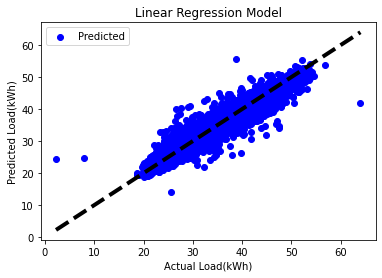

In [38]:
def plot(x,y,x_label=None,y_label=None, title=None, style1=None, color1=None, label1=None, y2=None, label2=None, \
           style2=None, color2=None):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plot1 = plt.scatter(x, y, color=color1)
    plot2, = plt.plot([(y_test).min(), (y_test).max()], [(y_test).min(), (y_test).max()], 'k--', lw=4)
    plt.legend([plot1], [label1, label2])
    plt.show()
    
plot(y_test, y_test_pred, 'Actual Load(kWh)', 'Predicted Load(kWh)',  'Linear Regression Model', \
       style1='.', color1='blue', label1='Predicted', y2=y_test, label2='Actual', \
       style2='--', color2='black')
